In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
SS=SS()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [130]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [135]:
def handle_missing_values(dataframe,cols):
# inside preprocessing
    imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
    # strategy can be median or most_frequent
    imputer.fit(dataframe.iloc[:,cols[0]])
    for num in cols:
        dataframe.iloc[:,num] = imputer.transform(dataframe.iloc[:,num])

def one_hot_encoder(dataframe,cols):
    l_encoder = LabelEncoder() # label encoder is in pre processing it'll convert 
    for col in cols:
        l_encoder.fit_transform(dataframe[:,col])
        # if there are only 2 variables in the category eg. yes or no then we do not do the one hot encoding as 
        one_encoder = OneHotEncoder(categorical_features=[col])# cols is the column to be one hod encoded
        dataframe[:,col]=one_encoder.fit_transform(dataframe[:,col]).toarray()
    return dataframe


In [101]:
dataframe = pd.read_csv("Data/bike_sharing.csv",sep=',')

In [102]:
dataframe.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11721,11722,2012-05-08,2,1,5,14,0,2,1,3,0.62,0.6061,0.69,0.3284,8,63,71


In [103]:
dataframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [104]:
dataframe = dataframe.rename(columns={'cnt':'y'})

In [105]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
y             17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [106]:
dataframe = dataframe.drop('dteday',axis=1)

In [107]:
dataframe.nunique()

instant       17379
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
y               869
dtype: int64

In [108]:
X = pd.DataFrame(dataframe[dataframe.columns])

In [109]:
X= X.rename(columns={'cnt':'y'})

In [110]:
X.shape

(17379, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d2e48f3c8>,
      dtype=object)

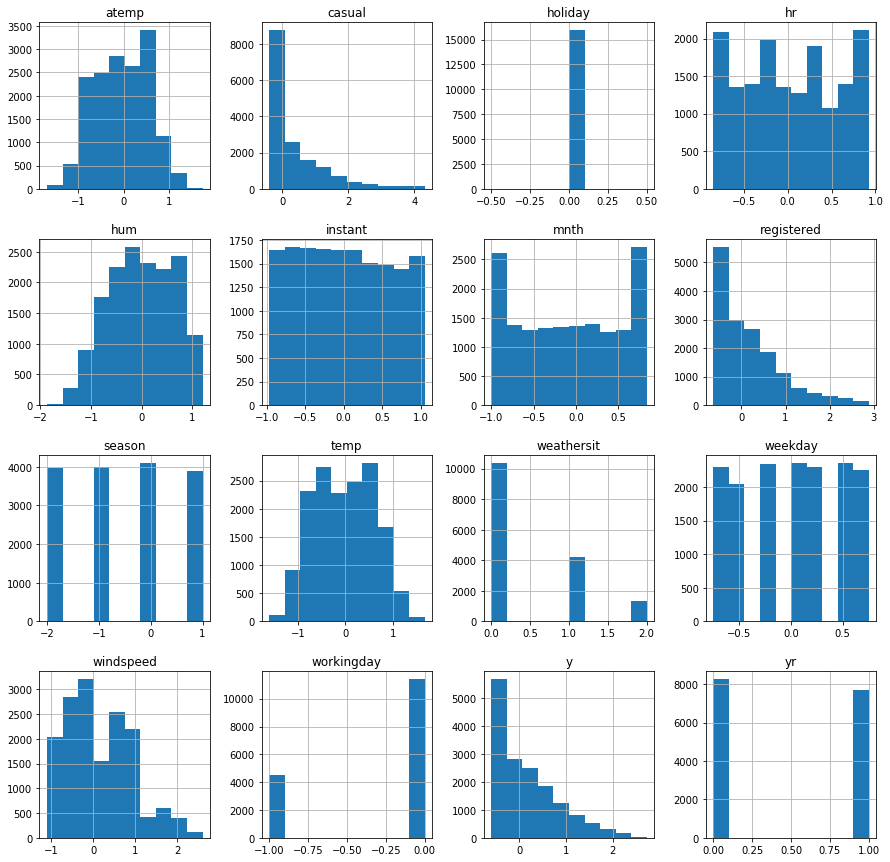

In [136]:
X.hist(figsize=(15,15))

In [112]:
X.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
y             17379 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


In [114]:
X.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
y             0
dtype: int64

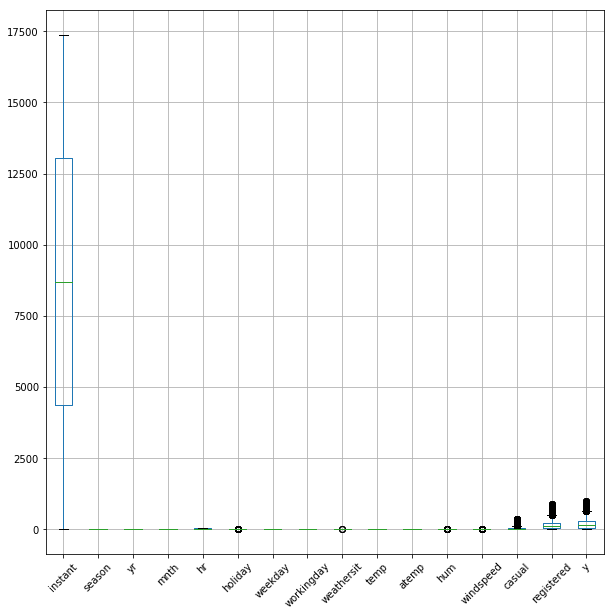

In [115]:
X.boxplot(figsize=(10,10),rot=45)

In [116]:
X.shape

(17379, 16)

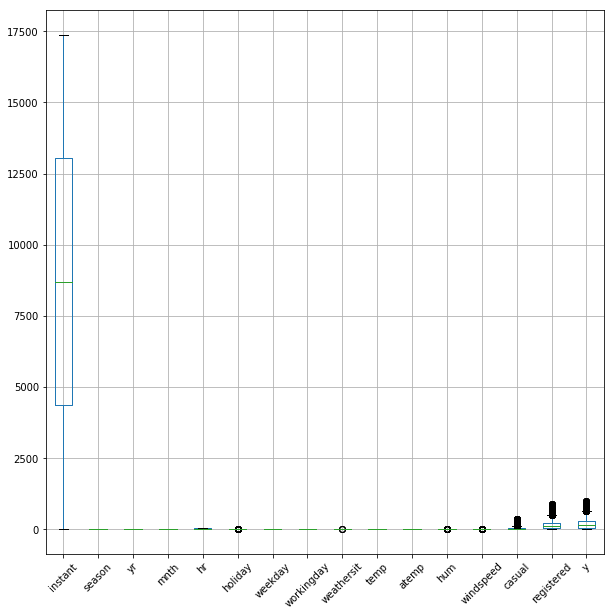

In [117]:
X.boxplot(figsize=(10,10),rot=45)

In [118]:
X = preprocess_obj.remove_outlier(X)

In [119]:
X.isna().sum()

instant         0
season          0
yr              0
mnth            0
hr              0
holiday       500
weekday         0
workingday      0
weathersit      3
temp            0
atemp           1
hum            22
windspeed     107
casual        467
registered    371
y             244
dtype: int64

In [120]:
X = X.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d49ac6898>,
      dtype=object)

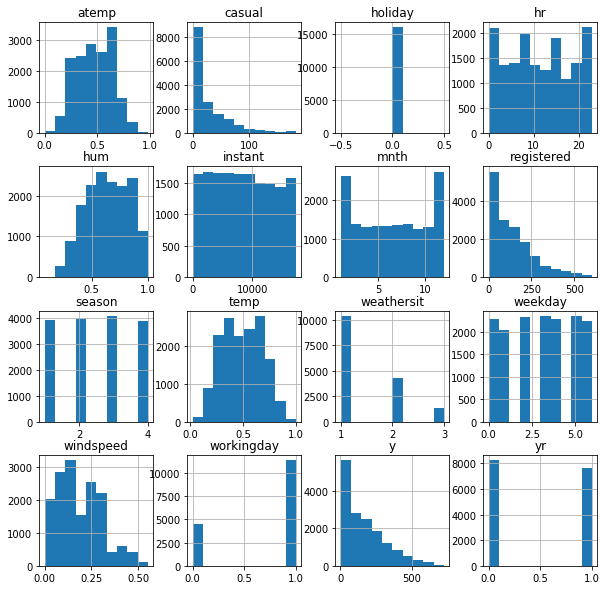

In [121]:
X.hist(figsize=(10,10))

In [122]:
X.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
count,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.0,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000
mean,8494.814799,2.496988,0.481863,6.517886,11.391741,0.0,3.028995,0.714949,1.433476,0.490636,0.470385,0.635783,0.186057,29.098531,138.062759,167.161290
std,5007.496991,1.111365,0.499687,3.460063,7.025470,0.0,1.989942,0.451453,0.642780,0.191510,0.170892,0.190632,0.117621,35.593614,127.251763,149.624907
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4172.250000,2.000000,0.000000,4.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.340000,0.333300,0.490000,0.104500,3.000000,31.000000,37.000000
50%,8333.500000,3.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.500000,0.484800,0.640000,0.164200,15.000000,109.000000,133.000000
75%,12803.750000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,42.000000,203.000000,256.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,1.000000,0.984800,1.000000,0.552200,183.000000,605.000000,729.000000


In [123]:
# n = Normalizer().fit(np.array(X['cnt']).reshape(-1,1))
# for item in X:
#     X[item]=n.fit_transform(np.array(X[item]).reshape(-1,1))

In [124]:
X.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
count,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.0,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000,15934.000000
mean,8494.814799,2.496988,0.481863,6.517886,11.391741,0.0,3.028995,0.714949,1.433476,0.490636,0.470385,0.635783,0.186057,29.098531,138.062759,167.161290
std,5007.496991,1.111365,0.499687,3.460063,7.025470,0.0,1.989942,0.451453,0.642780,0.191510,0.170892,0.190632,0.117621,35.593614,127.251763,149.624907
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4172.250000,2.000000,0.000000,4.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.340000,0.333300,0.490000,0.104500,3.000000,31.000000,37.000000
50%,8333.500000,3.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.500000,0.484800,0.640000,0.164200,15.000000,109.000000,133.000000
75%,12803.750000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,42.000000,203.000000,256.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,1.000000,0.984800,1.000000,0.552200,183.000000,605.000000,729.000000


In [125]:
# trying with scaling the output too output :
Y = X['y']
# not scaling as the linear regression also will also perfor m scaling.
rs = RobustScaler().fit(X)
for item in X:
    X[item]=rs.fit_transform(np.array(X[item]).reshape(-1,1))
X['y']=Y

/home/admin1/Downloads/enter/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/admin1/Downloads/enter/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/admin1/Downloads/enter/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/admin1/Downloads/enter/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

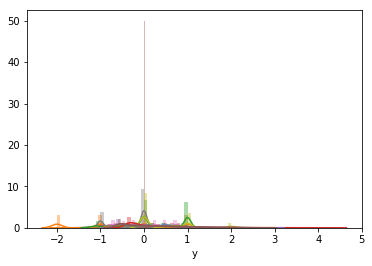

In [126]:
for item in X:
    sns.distplot(X[item])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d490d8f98>,
      dtype=object)

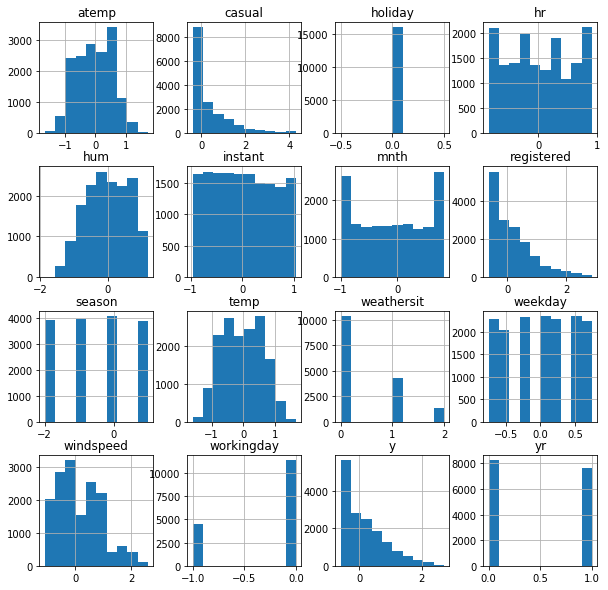

In [127]:
X.hist(figsize=(10,10))

In [128]:
class MultiLinearRegression:
    
    def init(self):
        print("In Multi linear regression")
    
    def multi_Linear_Regression_demo(self,dataframe):
#         fig = plt.figure(figsize=(12,10))
#         ax = Axes3D(fig)
        Y_train = dataframe['y']
        traindata = dataframe.drop('y', axis=1)
        traindata, test_data, Y_train,  Y_test = train_test_split(traindata,Y_train,test_size = 0.3, random_state=0)
        linear_reg = LinearRegression(normalize=True)
        linear_reg.fit(traindata,Y_train)
        Ypred = linear_reg.predict(test_data)
        error_mae = mean_absolute_error(Ypred,Y_test)
        error_rmse = mean_squared_error(Ypred,Y_test)
        r2score = r2_score(Ypred,Y_test)
        accuracy=(1-error_rmse)*100
#         plt.scatter(traindata,Y_train,marker='*',color='r')
#         plt.plot([-2,4],linear_reg.predict(np.array([-2,4]).reshape(2,1)))
#         plt.title('Scattered Points with predicted Line')
        print("Accuracy using root mean squared error is ",accuracy,'%\n')
        print("mae: {}, rmse: {}".format(error_mae,np.sqrt(error_rmse)))
#         x0 = traindata.iloc[:,0]
#         x1 = traindata.iloc[:,1]
#         yp = np.array(np.add(np.multiply(x0,linear_reg.coef_[0]),np.multiply(x1,linear_reg.coef_[1]))).reshape(-1,1)
#         ax.scatter(traindata.iloc[:,0],traindata.iloc[:,1],color='g')
#         ax.plot_wireframe(X=x0,Y=x1,Z=yp,linewidth = 1.2,color='r')
        print(linear_reg.coef_)
#         plt.show()
    
    def main(self,dataframe):
        self.multi_Linear_Regression_demo(dataframe)

if __name__ == '__main__':
    obj = MultiLinearRegression()
    obj.main(X)


Accuracy using root mean squared error is  100.0 %

mae: 4.84590521977742e-16, rmse: 6.002402010039317e-16
[ 3.16028594e-16 -2.42351837e-16 -5.36992580e-16  3.17694518e-16
  6.84083796e-16  0.00000000e+00  1.54587165e-17  7.37325915e-17
  2.81802482e-16 -5.45203012e-16  2.40331645e-18  1.19276471e-16
 -2.08912639e-16  1.78082192e-01  7.85388128e-01]
